# Introduction

A look at unloaded and loaded belt speeds.

# Imports

In [1]:
import sys
sys.path.append('../src')

In [2]:
import matplotlib.pyplot as plt
from gaitanalysis import motek

In [3]:
import utils

In [4]:
%matplotlib inline

In [5]:
from IPython.core.pylabtools import figsize

# Load and Process Data

Load the path to the directory with the experimental data.

In [6]:
PATHS = utils.config_paths()
PATHS

{'figures_dir': '/home/moorepants/Manuscripts/gait-control-direct-id-paper/figures',
 'processed_data_dir': '/home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data',
 'project_root': '/home/moorepants/Manuscripts/gait-control-direct-id-paper',
 'raw_data_dir': '/home/moorepants/Manuscripts/gait-control-direct-id-paper/raw-data',
 'tables_dir': '/home/moorepants/Manuscripts/gait-control-direct-id-paper/tables'}

In [7]:
tables = utils.generate_meta_data_tables(PATHS['raw_data_dir'])

No meta file in /home/moorepants/Manuscripts/gait-control-direct-id-paper/raw-data/T002


Make a list of all the compensation trials.

In [8]:
trial_meta_df = tables['TOP|trial']

In [9]:
trial_meta_df[trial_meta_df['subject-id'] == 0]

,belt-speed-standard-deviation-percentage,cortex-version,datetime,dflow-version,id,marker-set,nominal-speed,nominal-speed-units,notes,pitch,stationary-platform,subject-id,sway
003,0.05,3.1.1.1290,2013-10-22,NaN,3,NaN,1.2,meters per second,This is an unloaded trial (no subject) of the ...,False,False,0,True
004,0.08,3.1.1.1290,2013-10-22,NaN,4,NaN,1.2,meters per second,This is an unloaded trial (no subject) of the ...,False,False,0,True
005,0.10,3.1.1.1290,2013-10-22,NaN,5,NaN,1.2,meters per second,This is an unloaded trial (no subject) of the ...,False,False,0,True
022,NaN,3.1.1.1290,2014-02-21,3.16.1,22,NaN,0.8,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
023,NaN,3.1.1.1290,2014-02-21,3.16.1,23,NaN,1.2,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
024,NaN,3.1.1.1290,2014-02-21,3.16.1,24,NaN,1.6,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
028,NaN,3.1.1.1290,2014-02-25,3.16.1,28,NaN,1.6,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
029,NaN,3.1.1.1290,2014-02-25,3.16.1,29,NaN,1.2,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
030,NaN,3.1.1.1290,2014-02-25,3.16.1,30,NaN,0.8,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
034,NaN,3.1.1.1290,2014-02-27,3.16.1,34,NaN,0.8,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False


In [10]:
same_speed_trials = trial_meta_df[(trial_meta_df['subject-id'] == 0) &
                                  (trial_meta_df['nominal-speed'] == 1.2)]['id'].values

3.0 skipped
4.0 skipped
5.0 skipped


(0.8, 1.6)

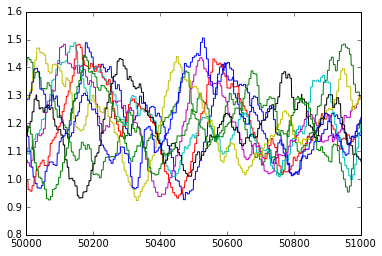

In [11]:
for trial_id in same_speed_trials:
    file_paths = utils.trial_file_paths(PATHS['raw_data_dir'], '{0:0>3}'.format(int(trial_id)))
    dat = motek.DFlowData(*file_paths)
    try:
        record = dat._load_record_data()
    except IOError:
        print('{} skipped'.format(trial_id))
    else:
        plt.plot(record['RightBeltSpeed'])
plt.xlim((50000, 51000))
plt.ylim((0.8, 1.6))

# Footer

In [12]:
!git rev-parse HEAD

6af0c229bb0a9edf78f8489d5f0efe02d5685a57


In [13]:
!git --git-dir=/home/moorepants/src/GaitAnalysisToolKit/.git --work-tree=/home/moorepants/src/GaitAnalysisToolKit rev-parse HEAD

9e80dfdcfe0a14b44e0ebcbadb6e9e827d215c3c


In [14]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Installed version_information.py. To use it, type:
  %load_ext version_information


In [15]:
%load_ext version_information

In [16]:
%version_information numpy, scipy, pandas, matplotlib, tables, oct2py, dtk, gaitanalysis

Software,Version
Python,2.7.9 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython,3.0.0
OS,Linux 3.13.0 49 generic x86_64 with debian jessie sid
numpy,1.9.2
scipy,0.15.1
pandas,0.16.0
matplotlib,1.4.2
tables,3.1.1
oct2py,3.1.0
dtk,0.4.0


In [17]:
!conda list

# packages in environment at /home/moorepants/anaconda/envs/gait-direct-id-paper:
#
backports.ssl-match-hostname 3.4.0.2                   <pip>
cairo                     1.12.18                       0  
dateutil                  2.4.1                    py27_0  
dynamicisttoolkit         0.4.0                    py27_0  
fastcache                 1.0.2                    py27_0  
fontconfig                2.11.1                        2  
freetype                  2.4.10                        0  
gaitanalysistoolkit (/home/moorepants/src/GaitAnalysisToolKit) 0.2.0.dev0                <pip>
hdf5                      1.8.14                        0  
ipython                   3.0.0                    py27_0  
ipython-notebook          3.0.0                    py27_1  
jinja2                    2.7.3                    py27_1  
jsonschema                2.4.0                    py27_0  
libpng                    1.5.13                        1  
libsodium                 0.4.5         

In [18]:
!pip freeze

backports.ssl-match-hostname==3.4.0.2
DynamicistToolKit==0.4.0
fastcache==1.0.2
-e git+git@github.com:csu-hmc/GaitAnalysisToolKit.git@9e80dfdcfe0a14b44e0ebcbadb6e9e827d215c3c#egg=GaitAnalysisToolKit-origin_speedup-inverse-dynamics
ipython==3.0.0
Jinja2==2.7.3
jsonschema==2.4.0
MarkupSafe==0.23
matplotlib==1.4.2
mistune==0.5.1
nose==1.3.4
numexpr==2.3.1
numpy==1.9.2
oct2py==3.1.0
pandas==0.16.0
ptyprocess==0.4
Pygments==2.0.2
pyparsing==2.0.1
PySide==1.2.1
python-dateutil==2.4.2
pytz==2015.2
PyYAML==3.11
pyzmq==14.5.0
scipy==0.15.1
seaborn==0.5.1
six==1.9.0
snakeviz==0.3.1
sympy==0.7.6
tables==3.1.1
terminado==0.5
tornado==4.1
